In [1]:
# 基础的东西 这一part貌似挺好滴
# from sp_functions import get_data
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import matplotlib as mpl

In [48]:
def get_data(name, cols=None, fmt=None, skipfooter=0):
    df = pd.read_csv(name, engine='python',skipfooter=skipfooter)
    df = df.set_index('Date')
    df.index = pd.to_datetime(df.index, format=fmt)
    if cols is None:
        return df
    else:
        return df[cols]
        
data = get_data("data-220020013.csv")
data = data.dropna(how='any')

In [49]:
data

,fund_1,fund_2,fund_3,fund_4,fund_5,fund_6,fund_7,fund_8,fund_9,fund_10
Date,,,,,,,,,,
2009-03-31,0.0290,0.0010,-0.1370,-0.1470,-0.0640,-0.1140,-0.1019,-0.0308,-0.1102,0.1067
2009-06-30,0.4160,0.4430,0.6600,0.6620,0.4750,0.4910,0.4290,0.3243,0.0381,-0.0405
2009-09-30,0.1920,0.2340,0.3050,0.1570,0.2740,0.1980,0.1004,0.2067,0.0066,0.0776
2009-12-31,-0.0020,-0.0020,0.1410,-0.0020,-0.0020,0.0560,-0.0106,0.0739,0.0207,0.0668
2010-03-31,0.0340,0.0190,0.0920,0.0460,0.0540,0.0180,-0.0079,0.0322,0.0091,-0.0242
2010-06-30,0.0290,0.0610,0.0940,0.0020,0.0500,0.0040,0.0750,0.0168,0.0278,0.1415
2010-09-30,0.1540,0.1620,0.1420,0.1910,0.1830,0.1430,0.0679,0.1220,-0.0025,0.0145
2010-12-31,0.0120,0.0020,-0.0440,0.0010,-0.0260,-0.0190,-0.0344,-0.0160,0.0173,0.0608
2011-03-31,-0.0260,-0.0580,-0.1470,-0.0900,-0.0730,-0.0490,-0.0510,-0.0593,0.0172,0.0085


In [8]:
# 1 用max return 限制weight sum为1 平均年度std为0.2
def cal_risk_contribution(w, cov):
    w = w[:, None]
    sigma_p = np.sqrt(np.matmul(np.matmul(w.T, cov), w)) #风险 控制在20%之内
    risk_contrib = w * np.matmul(cov, w) / sigma_p 
    risk_contrib_pct = risk_contrib / sigma_p
    return risk_contrib_pct.squeeze()


def record_results(weight, asset_return, port_val):
    asset_return_cum = (asset_return + 1).cumprod()
    port_return_cum = (asset_return_cum * weight).sum(axis=1)
    port_val_new = port_return_cum * port_val.iloc[-1, 0]
    port_val_new = port_val_new.to_frame()
    port_val_new.columns = port_val.columns
    port_val = port_val.append(port_val_new)
    return port_val


def cal_return(w):
    w = w[:, None]
    train_data1 = np.array(train_data)
    re = -np.sum(np.matmul(train_data1, w), axis=0)
    return re.squeeze()

In [58]:
def get_weight(cov):
    n_assets = len(cov)
    init_w = np.array([1 / n_assets] * n_assets)

    def opt(w, cov):
        return_all = cal_return(w)
        return return_all

    cons = [{
        'type': 'eq',
        'fun': lambda x: np.sum(x) - 1
    }, {
        'type': 'ineq',
        'fun': lambda x: -np.sqrt(np.matmul(np.matmul(x.T, cov), x))*4 + 0.2
    }]
    bounds = [[0, 1]] * n_assets
    res = minimize(opt,
                   init_w,
                   args=(cov, ),
                   constraints=cons,
                   method='SLSQP',
                   bounds=bounds)
    assert res.success
    return res.x


# 1）这个里面的cons设置有问题，sum权重是一，但是后面的std不是整个区间的（year=5），
#而要是一年的，又不可以简单/区间长度（5），因为不是年平均std小于20%是每一年都是小于20%，
#那是不是要写个函数还是咋样，我不会

## 回测！

In [103]:
rebal_days = ['2014/09/30','2015/09/30','2016/09/30','2017/09/30','2018/09/30','2019/09/30', '2020/09/30']
rebal_days = [pd.to_datetime(x) for x in rebal_days]

port_value = pd.DataFrame(index=[rebal_days[0]], data=[[100]], columns=["Risk Parity"])
port_value_eq = pd.DataFrame(index=[rebal_days[0]], data=[[100]], columns=["Equal Weight"])

In [104]:
w_star_list = []
port_value_list = []
port_value_eq_list = []
for rebal_date, next_date in zip(rebal_days[:-1],rebal_days[1:]):
# for rebal_date in rebal_days:
    train_start_date = rebal_date - pd.DateOffset(years=5)#years=5
    train_data = data.loc[train_start_date:rebal_date]
    cov = train_data.cov().values #*4
    w_star = get_weight(cov)
    w_star_list.append(w_star)#list
    asset_return = data.loc[rebal_date:next_date]
    port_value = record_results(w_star, asset_return, port_value)
    port_value_list.append(port_value)#list
    w_eq = np.array([1/10]*10)
    port_value_eq = record_results(w_eq, asset_return, port_value_eq)
    port_value_eq_list.append(port_value_eq)#list

In [105]:
sigma_p_eq = 4* np.sqrt(np.matmul(np.matmul(w_eq.T,cov), w_eq))
sigma_p = 4* np.sqrt(np.matmul(np.matmul(w_star.T,cov), w_star))

# 问题是只配了两只基金。。。
sigma_p, sigma_p_eq, w_star

(0.2000000000148374,
 0.15928032419665172,
 array([0.00000000e+00, 0.00000000e+00, 5.32452822e-16, 7.01611659e-01,
        0.00000000e+00, 0.00000000e+00, 1.37971788e-16, 0.00000000e+00,
        2.98388341e-01, 4.15094855e-16]))

In [106]:
w_star_list

[array([0.00000000e+00, 4.18687961e-17, 3.48915955e-02, 1.33969583e-02,
        1.24460349e-16, 5.03512321e-01, 2.56667594e-17, 0.00000000e+00,
        2.20716849e-01, 2.27482276e-01]),
 array([1.36619079e-16, 2.08191573e-16, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 5.73334733e-01, 7.89370277e-17, 2.50733016e-16,
        3.58474767e-01, 6.81904995e-02]),
 array([1.49056138e-16, 3.04290239e-16, 1.39681622e-01, 3.11848912e-18,
        2.34172941e-16, 4.30347701e-01, 4.36581917e-16, 4.44124081e-16,
        3.47354639e-01, 8.26160384e-02]),
 array([0.00000000e+00, 9.94771770e-02, 3.29033129e-02, 2.17075836e-16,
        3.69012217e-16, 6.00928363e-01, 0.00000000e+00, 0.00000000e+00,
        2.66691147e-01, 3.47393448e-16]),
 array([4.63755108e-16, 3.59965794e-01, 0.00000000e+00, 0.00000000e+00,
        2.53200202e-17, 4.66614408e-01, 0.00000000e+00, 0.00000000e+00,
        1.73419798e-01, 0.00000000e+00]),
 array([0.00000000e+00, 0.00000000e+00, 5.32452822e-16, 7.01611659e-01

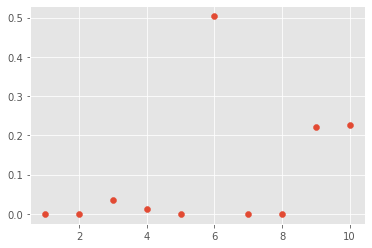

In [107]:
plt.scatter(np.arange(1,11), w_star_list[0])

In [108]:
plt.style.use('ggplot')

In [109]:
port = pd.concat([port_value, port_value_eq], axis=1)

In [110]:
port

,Risk Parity,Equal Weight
2014-09-30,100.000000,100.000000
2014-09-30,110.500934,108.382000
2014-12-31,115.563452,115.330509
2015-03-31,121.478460,119.919440
2015-06-30,120.110376,118.431761
2015-09-30,126.976622,119.598074
2015-09-30,135.224827,120.407753
2015-12-31,134.823421,122.062899
2016-03-31,130.296627,118.782084
2016-06-30,135.298110,125.133614


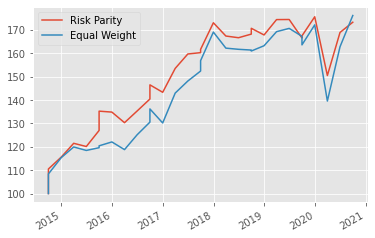

In [111]:
port.plot()

In [112]:
port_value.iloc[-1]

Risk Parity    173.241749
Name: 2020-09-30 00:00:00, dtype: float64

In [113]:
port_value_eq.iloc[-1]

Equal Weight    176.111391
Name: 2020-09-30 00:00:00, dtype: float64

In [27]:
for rebal_date, next_date in zip(rebal_days[:-1],rebal_days[1:]):
    train_start_date = rebal_date - pd.DateOffset(years=5)#years=5
    break
train_start_date,rebal_date

(Timestamp('2009-09-30 00:00:00'), Timestamp('2014-09-30 00:00:00'))

In [28]:
train_data = data.loc[train_start_date:rebal_date].iloc[:-1] #Add .iloc[:-1], 保证完整的5年
train_data

,fund_1,fund_2,fund_3,fund_4,fund_5,fund_6,fund_7,fund_8,fund_9,fund_10
Date,,,,,,,,,,
2009-09-30,0.1920,0.2340,0.3050,0.1570,0.2740,0.1980,0.1004,0.2067,0.0066,0.0776
2009-12-31,-0.0020,-0.0020,0.1410,-0.0020,-0.0020,0.0560,-0.0106,0.0739,0.0207,0.0668
2010-03-31,0.0340,0.0190,0.0920,0.0460,0.0540,0.0180,-0.0079,0.0322,0.0091,-0.0242
2010-06-30,0.0290,0.0610,0.0940,0.0020,0.0500,0.0040,0.0750,0.0168,0.0278,0.1415
2010-09-30,0.1540,0.1620,0.1420,0.1910,0.1830,0.1430,0.0679,0.1220,-0.0025,0.0145
2010-12-31,0.0120,0.0020,-0.0440,0.0010,-0.0260,-0.0190,-0.0344,-0.0160,0.0173,0.0608
2011-03-31,-0.0260,-0.0580,-0.1470,-0.0900,-0.0730,-0.0490,-0.0510,-0.0593,0.0172,0.0085
2011-06-30,-0.0100,-0.0250,0.0150,0.0490,0.0260,-0.0270,-0.0154,-0.0047,0.0073,0.0494
2011-09-30,-0.0940,-0.0870,-0.0520,-0.0140,-0.0890,-0.1070,-0.0777,-0.0820,0.0087,0.1917


In [31]:
#修改cov对应每一个周期（1year）#->划分tran_data成5份
train_data.iloc[0:4] 
train_data.iloc[4:8] 
train_data.iloc[8:12] 
train_data.iloc[12:16] 
train_data.iloc[16:20]

,fund_1,fund_2,fund_3,fund_4,fund_5,fund_6,fund_7,fund_8,fund_9,fund_10
Date,,,,,,,,,,
2013-09-30,0.0130,-0.0110,-0.0450,-0.0840,-0.0430,0.1700,-0.0075,0.0093,-0.0858,0.1606
2013-12-31,0.1000,0.1230,0.2490,0.1310,0.1950,0.1630,0.0973,0.1453,0.0141,-0.1982
2014-03-31,0.0660,0.0978,0.1021,0.0537,0.0753,0.0360,0.0486,0.0074,0.0185,0.0424
2014-06-30,0.1683,0.1669,0.3572,0.2267,0.2292,0.1625,0.1991,0.1314,0.0491,0.0054


In [32]:
len(train_data)

20

In [33]:
w_star_5years = []
for i in [0, 4, 8, 12, 16]:
    small_data = train_data.iloc[i:i+4]
    cov = small_data.cov().values
    w_star = get_weight(cov)
    w_star_5years.append(w_star)
#后面这一部分先忽略？
    #     asset_return = data.loc[rebal_date:next_date]
#     port_value = record_results(w_star, asset_return, port_value)
#     w_eq = np.array([1/10]*10)
#     port_value_eq = record_results(w_eq, asset_return, port_value_eq)

In [34]:
w_star_5years 

[array([0.00000000e+00, 2.03157483e-16, 1.00000000e+00, 3.45008993e-16,
        7.32920669e-17, 8.81130959e-16, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00]),
 array([0.00000000e+00, 2.03157483e-16, 1.00000000e+00, 3.45008993e-16,
        7.32920669e-17, 8.81130959e-16, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00]),
 array([0.00000000e+00, 2.03157483e-16, 1.00000000e+00, 3.45008993e-16,
        7.32920669e-17, 8.81130959e-16, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00]),
 array([0.00000000e+00, 2.03157483e-16, 1.00000000e+00, 3.45008993e-16,
        7.32920669e-17, 8.81130959e-16, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00]),
 array([0.00000000e+00, 2.03157483e-16, 1.00000000e+00, 3.45008993e-16,
        7.32920669e-17, 8.81130959e-16, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00])]

In [35]:
#计算每年的方差
for w_star in w_star_5years:
    sigma_p_eq = np.sqrt(np.matmul(np.matmul(w_eq.T,cov), w_eq))
    sigma_p = np.sqrt(np.matmul(np.matmul(w_star.T,cov), w_star))
    print(sigma_p_eq, sigma_p)

0.06910550550908855 0.17516708927954083
0.06910550550908855 0.17516708927954083
0.06910550550908855 0.17516708927954083
0.06910550550908855 0.17516708927954083
0.06910550550908855 0.17516708927954083


In [36]:
w_star_5years

[array([0.00000000e+00, 2.03157483e-16, 1.00000000e+00, 3.45008993e-16,
        7.32920669e-17, 8.81130959e-16, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00]),
 array([0.00000000e+00, 2.03157483e-16, 1.00000000e+00, 3.45008993e-16,
        7.32920669e-17, 8.81130959e-16, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00]),
 array([0.00000000e+00, 2.03157483e-16, 1.00000000e+00, 3.45008993e-16,
        7.32920669e-17, 8.81130959e-16, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00]),
 array([0.00000000e+00, 2.03157483e-16, 1.00000000e+00, 3.45008993e-16,
        7.32920669e-17, 8.81130959e-16, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00]),
 array([0.00000000e+00, 2.03157483e-16, 1.00000000e+00, 3.45008993e-16,
        7.32920669e-17, 8.81130959e-16, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00])]

In [39]:
small_data

,fund_1,fund_2,fund_3,fund_4,fund_5,fund_6,fund_7,fund_8,fund_9,fund_10
Date,,,,,,,,,,
2013-09-30,0.0130,-0.0110,-0.0450,-0.0840,-0.0430,0.1700,-0.0075,0.0093,-0.0858,0.1606
2013-12-31,0.1000,0.1230,0.2490,0.1310,0.1950,0.1630,0.0973,0.1453,0.0141,-0.1982
2014-03-31,0.0660,0.0978,0.1021,0.0537,0.0753,0.0360,0.0486,0.0074,0.0185,0.0424
2014-06-30,0.1683,0.1669,0.3572,0.2267,0.2292,0.1625,0.1991,0.1314,0.0491,0.0054
